# U.S. Medical Insurance Costs

In [64]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm


In [52]:
medical_df = pd.read_csv("insurance.csv")
print(medical_df.head)

<bound method NDFrame.head of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>


In [104]:
print(medical_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   object 
 2   bmi             1338 non-null   float64
 3   children        1338 non-null   int64  
 4   smoker          1338 non-null   object 
 5   region          1338 non-null   object 
 6   charges         1338 non-null   float64
 7   region_numeric  1338 non-null   int8   
 8   sex_numeric     1338 non-null   int64  
 9   intercept       1338 non-null   int64  
 10  smoker_numeric  1338 non-null   int64  
dtypes: float64(2), int64(5), int8(1), object(3)
memory usage: 106.0+ KB
None


In [81]:
ages = medical_df.age
print(ages.mean())

39.20702541106129


In [96]:
male_count = medical_df['sex'].value_counts()
print(male_count)


sex
male      676
female    662
Name: count, dtype: int64


In [103]:
print(medical_df['charges'].describe().round(2))

count     1338.00
mean     13270.42
std      12110.01
min       1121.87
25%       4740.29
50%       9382.03
75%      16639.91
max      63770.43
Name: charges, dtype: float64


In [99]:
regions = medical_df.region
print(regions.unique())

['southwest' 'southeast' 'northwest' 'northeast']


In [62]:
mean_charges_by_sex = medical_df.groupby("sex")["charges"].mean()
print(mean_charges_by_sex)

sex
female    12569.578844
male      13956.751178
Name: charges, dtype: float64


This plot provides a visual representation of how insurance charges change with age and highlights the need for a more comprehensive analysis to account for other contributing factors.

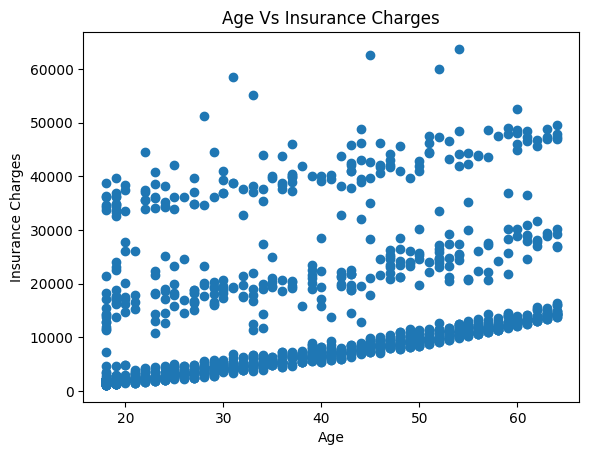

In [106]:

def age_vs_code(medical_df):
    plt.scatter(medical_df["age"], medical_df["charges"])
    plt.xlabel("Age")
    plt.ylabel("Insurance Charges")
    plt.title("Age Vs Insurance Charges")
    plt.show()
age_vs_code(medical_df)



**Correlation:**
The correlation between age and insurance charges is 0.29, indicating a weak positive relationship. This suggests that as age increases, insurance charges tend to increase slightly, but the relationship is not very strong.





In [105]:
from statistics import correlation

correlation = medical_df["age"].corr(medical_df["charges"])
print(f'Correlation between age and insurance charges: {correlation}')

Correlation between age and insurance charges: 0.2990081933306477


Plot Description:
The scatter plot visualizes the relationship between the age of individuals and their medical insurance charges. Each dot represents an individual, with the x-axis indicating their age and the y-axis representing their insurance charges.

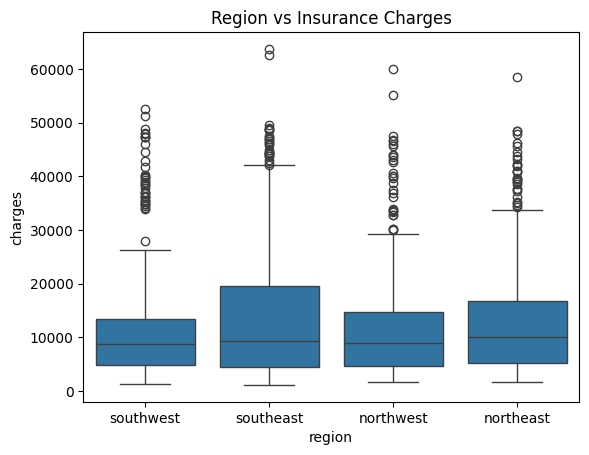

In [56]:
sns.boxplot(x = "region", y = "charges", data = medical_df)
plt.title('Region vs Insurance Charges')
plt.show()

Weak Correlation: The correlation coefficient is very close to 0, specifically -0.0062, indicating an extremely weak (almost negligible) negative linear relationship between the region and insurance charges.

In [57]:
medical_df["region_numeric"] = medical_df["region"].astype("category").cat.codes
correlation = medical_df["region_numeric"].corr(medical_df["charges"])
print(f'Correlation : {correlation}')


Correlation : -0.006208234909444476


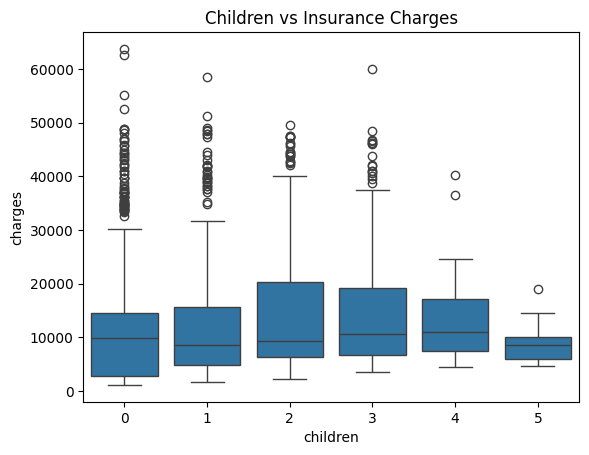

Correlation between number of children and insurance charges: 0.06799822684790473


In [59]:
sns.boxplot(x='children', y='charges', data=medical_df)
plt.title('Children vs Insurance Charges')
plt.show()

correlation_children = medical_df['children'].corr(medical_df['charges'])
print(f'Correlation between number of children and insurance charges: {correlation_children}')


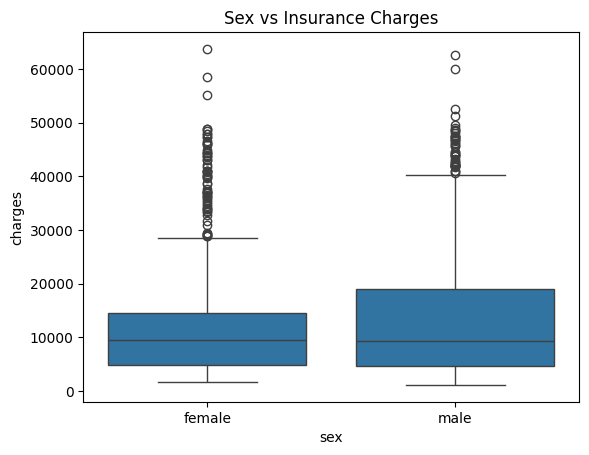

In [60]:
sns.boxplot(x = "sex", y = "charges", data = medical_df)
plt.title('Sex vs Insurance Charges')
plt.show()

Weak Correlation: The correlation coefficient is 0.0573, indicating a very weak positive linear relationship between a patient's sex and their insurance charges.

In [61]:
medical_df["sex_numeric"] = medical_df["sex"].apply(lambda x: 1 if x == "male" else 0)
correlation = medical_df["sex_numeric"].corr(medical_df["charges"])
print(correlation)

0.057292062202025366


**Regression Analysis:**
The regression analysis shows the coefficients for each variable:
- Age: A coefficient of 205.51 indicates that for each additional year of age, the insurance charges increase by about $205, holding other variables constant.
- BMI: A coefficient of 171.72 suggests that for each unit increase in BMI, insurance charges increase by about $172.
- Children: A coefficient of 406.53 means that having one more child increases insurance charges by about $407, though this result is not statistically significant (p-value > 0.05).

In [76]:
medical_df['intercept'] = 1
independent_vars = ['age', 'bmi', 'children', 'sex_numeric', 'region_numeric']
X = medical_df[independent_vars]
y = medical_df['charges']

model = sm.OLS(y, X).fit()
predictions = model.predict(X)


print(model.summary())


                                 OLS Regression Results                                
Dep. Variable:                charges   R-squared (uncentered):                   0.597
Model:                            OLS   Adj. R-squared (uncentered):              0.596
Method:                 Least Squares   F-statistic:                              395.5
Date:                Fri, 05 Jul 2024   Prob (F-statistic):                   2.82e-260
Time:                        15:18:36   Log-Likelihood:                         -14397.
No. Observations:                1338   AIC:                                  2.880e+04
Df Residuals:                    1333   BIC:                                  2.883e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------